## Assignment 8¶
## Nupoor Karnik/jhr497

In [73]:
# Import standard Python data science libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

# Load StatsModels API
# Note that if we wish to use R-style formulas, then we would use the StatsModels Formula API
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [79]:
# Import standard Python data science libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
sns.set()

# Import classes from scikit-learn for logistic regression, LDA, QDA, and KNN classification
# Import convenience function for computing confusion matrices 
# Import OneHotEncoder and StandardScaler for data pre-processing
# Import Pipeline, ColumnTransformer to encapsulate pre-processing heterogenous data and fitting
# into a single estimator
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Load StatsModels API
# Note that if we wish to use R-style formulas, then we would use the StatsModels Formula API
import statsmodels.api as sm
import statsmodels.formula.api as smf

### 5. We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

### (a) Generate a data set with *n* = 500 and *p* = 2, such that the observations belong to two classes with a quadratic decision boundary between them.

In [74]:
np.random.seed(1)
n = 500
p = 2

x1 = np.random.uniform(0, 1, n) - 0.5
x2 = np.random.uniform(0, 1, n) - 0.5
y  = 1*(x1**2-x2**2 > 0)
data = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
data.head()

,x1,x2,y
0,-0.082978,-0.412518,0
1,0.220324,-0.272690,0
2,-0.499886,-0.185623,1
3,-0.197667,-0.325234,0
4,-0.353244,0.107094,1


### (b) Plot the observations, colored according to their class labels. Your plot should display X1 on the x-axis, and X2 on the y- axis.

Text(0, 0.5, 'X2')

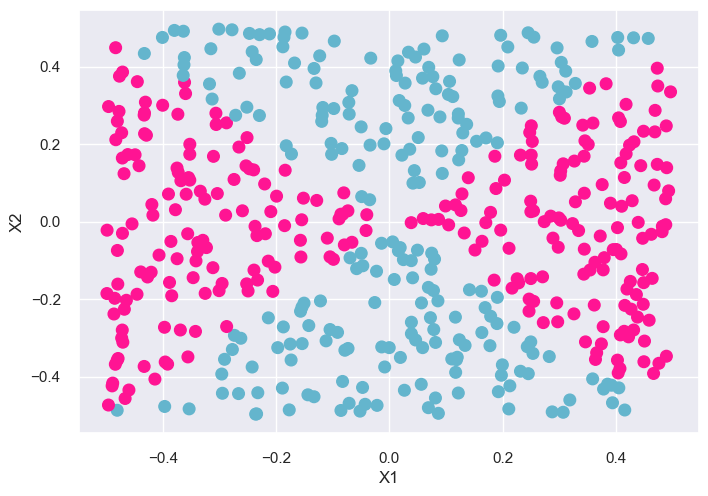

In [75]:
custom_colors = ['deeppink' if label == 1 else 'c' for label in y]

plt.scatter(x1, x2, s=70, c=custom_colors, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

### (c) Fit a logistic regression model to the data, using X1 and X2 as predictors.

In [80]:
# Separate predictors and target
X = data.drop(columns=["y"])
y = data["y"]

# Create an instance of LogisticRegression
log_reg = LogisticRegression()

# Fit logistic regression model
log_reg.fit(X, y)
params = np.concatenate((log_reg.intercept_, log_reg.coef_.flatten()))
pd.DataFrame(data={"Coef. Est.": params}, index=X.columns.insert(0, "intercept"))

,Coef. Est.
intercept,0.159621
x1,-0.083535
x2,-0.228647


### (d) Apply this model to the *training data* in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the *predicted* class labels. The decision boundary should be linear.

In [81]:
log_reg_probs = log_reg.predict_proba(X)
pd.DataFrame(log_reg_probs, columns = log_reg.classes_).head(10)

,0,1
0,0.435149,0.564851
1,0.449284,0.550716
2,0.439345,0.560655
3,0.437701,0.562299
4,0.458932,0.541068
5,0.446843,0.553157
6,0.471656,0.528344
7,0.439174,0.560826
8,0.469516,0.530484
9,0.446272,0.553728


In [82]:
log_reg_pred = log_reg.predict(X)
logit_res=pd.DataFrame(np.hstack((log_reg_probs, log_reg_pred.reshape(-1,1))), 
             columns = np.concatenate((log_reg.classes_, ["Prediction"])))
logit_res.head(10)

,0,1,Prediction
0,0.435149,0.564851,1.0
1,0.449284,0.550716,1.0
2,0.439345,0.560655,1.0
3,0.437701,0.562299,1.0
4,0.458932,0.541068,1.0
5,0.446843,0.553157,1.0
6,0.471656,0.528344,1.0
7,0.439174,0.560826,1.0
8,0.469516,0.530484,1.0
9,0.446272,0.553728,1.0


In [83]:
unique_predictions = logit_res["Prediction"].unique()
print("Unique Predicted Classes:", unique_predictions)

Unique Predicted Classes: [1.]


Training accuracy: 0.54


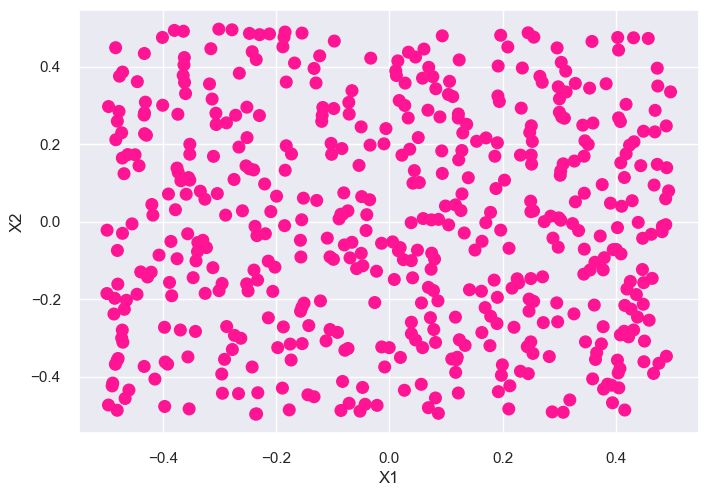

In [84]:
# Define custom colors for the classes
custom_colors = ['deeppink' if label == 1 else 'cyan' for label in logit_res["Prediction"]]

# Plot the scatter plot with custom colors
plt.scatter(x1, x2, s=70, c=custom_colors, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

print(f'Training accuracy: {log_reg.score(X, y)}')

In [85]:
prediction_counts = logit_res['Prediction'].value_counts()
print(prediction_counts)

Prediction
1.0    500
Name: count, dtype: int64


### (e) Now fit a logistic regression model to the data using non-linear functions of $X_1$ and $X_2$ as predictors (e.g. $X_{1}^2$, $X_1$x$X_2$, log($X_2$), and so forth).

In [86]:
new_X=X
new_X["x1_sq"]=np.power(X["x1"], 2)
new_X["x2_sq"]=np.power(X["x2"], 2)
new_X["x1x2"]=X["x1"]*X["x2"]
new_X.head()

,x1,x2,x1_sq,x2_sq,x1x2
0,-0.082978,-0.412518,0.006885,0.170171,0.034230
1,0.220324,-0.272690,0.048543,0.074360,-0.060080
2,-0.499886,-0.185623,0.249886,0.034456,0.092790
3,-0.197667,-0.325234,0.039072,0.105777,0.064288
4,-0.353244,0.107094,0.124781,0.011469,-0.037830


In [87]:
# fit the logit model
power_logit=LogisticRegression().fit(new_X, y)
params = np.concatenate((power_logit.intercept_, power_logit.coef_.flatten()))
pd.DataFrame(data = {"Coef. Est.":params}, index = new_X.columns.insert(0, "intercept"))

,Coef. Est.
intercept,0.082007
x1,-0.123606
x2,-0.237178
x1_sq,6.595793
x2_sq,-6.201045
x1x2,0.204474


### (f) Apply this model to the *training data* in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the *predicted class* labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)-(e) until you come up with an example in which the predicted class labels are obviously non-linear.

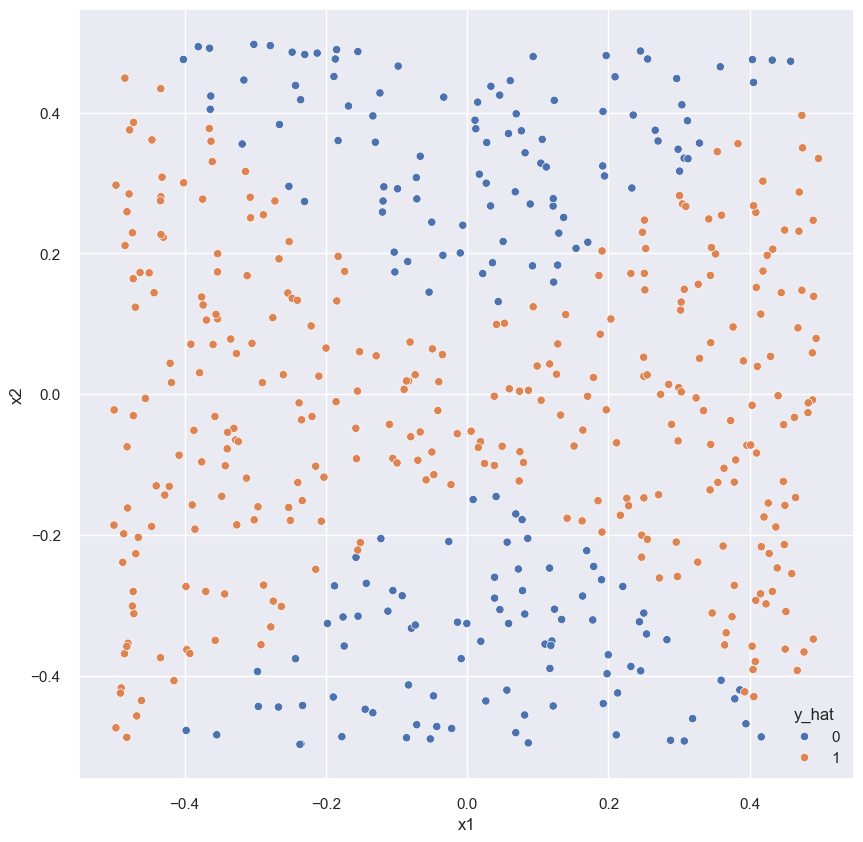

Training accuracy: 0.92


In [88]:
# make prediction
power_logit_pred = power_logit.predict(new_X)

# plot it
plot_power_logit = pd.DataFrame({'x1': X["x1"], 'x2':X["x2"], 'y_hat':power_logit_pred})
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y_hat', data=plot_power_logit)
plt.show();

print(f'Training accuracy: {power_logit.score(new_X, y)}')

### (g) Fit a support vector classifier to the data with $X_1$ and $X_2$ as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

Training accuracy: 0.54


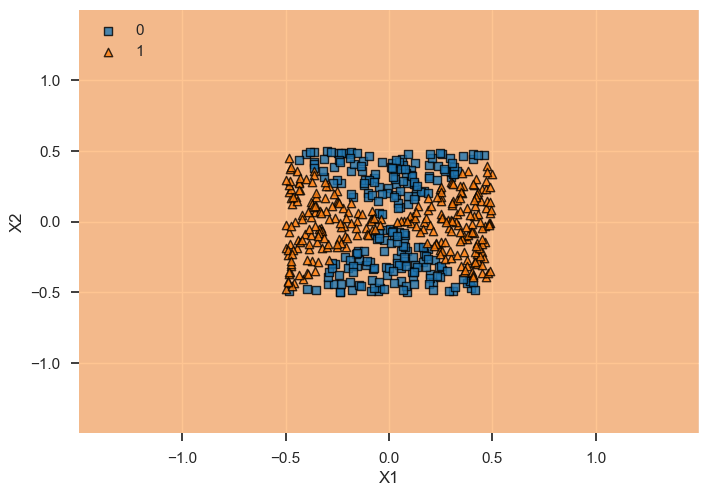

In [89]:
import patsy as pt
from sklearn import svm

f = 'y ~ x1 + x2 - 1'

y, X = pt.dmatrices(f, new_X)
y = np.ravel(y)

model = svm.SVC(kernel='linear', C=1, random_state=0, probability=True).fit(X, y)

plot_decision_regions(X, y.astype(np.int_), model, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')

print(f'Training accuracy: {model.score(X, y)}')

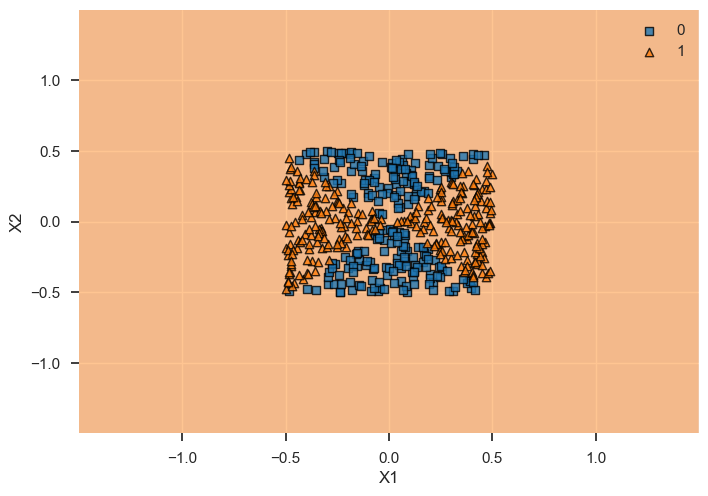

Training accuracy: 0.54


In [104]:
from sklearn.svm import LinearSVC, SVC

# Separate predictors and target
X = data[['x1', 'x2']]
y = data['y']

# Create an instance of SVC
svc = SVC(C=10, kernel='linear')

# Fit the SVC model
svc.fit(X, y)

# Plot decision regions
plot_decision_regions(X.values, y.values, clf=svc, legend=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


print(f'Training accuracy: {svc.score(X, y)}')

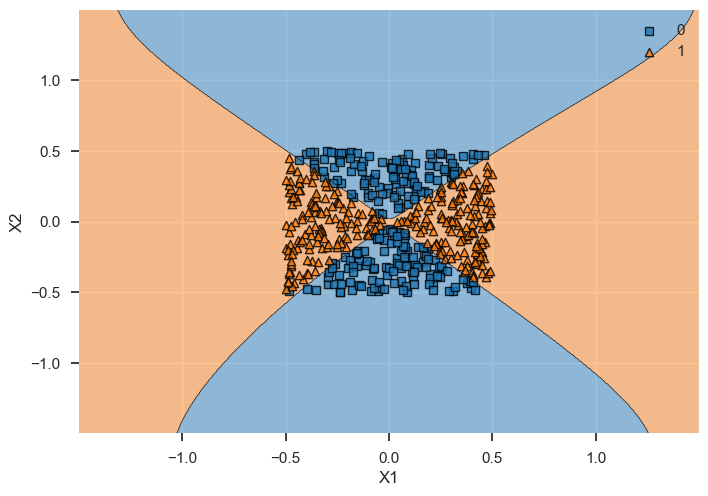

In [106]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
radial_fit = svm.fit(X, y)
plot_decision_regions(X.values, y.values, clf=svm, legend=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


In [92]:
print(data)

           x1        x2  y
0   -0.082978 -0.412518  0
1    0.220324 -0.272690  0
2   -0.499886 -0.185623  1
3   -0.197667 -0.325234  0
4   -0.353244  0.107094  1
..        ...       ... ..
495  0.431861  0.474403  0
496  0.436868 -0.188297  1
497  0.344330  0.168797  1
498  0.420207 -0.174033  1
499 -0.272100  0.274477  0

[500 rows x 3 columns]


In [93]:
def plot_clf(model, data, grid_range, show_contours=False, show_support_vectors=False):
    # Decision boundary plot
    
    # Get grid of values in given range
    x1 = grid_range
    x2 = grid_range
    xx1, xx2 = np.meshgrid(x1, x2, sparse=False)
    Xgrid = np.stack((xx1.flatten(), xx2.flatten())).T
    
    # Get decision boundary values for plot grid
    decision_boundary      = model.predict(Xgrid)
    decision_boundary_grid = decision_boundary.reshape(len(x2), len(x1))
    
    # Get decision function values for plot grid
    decision_function      = model.decision_function(Xgrid)
    decision_function_grid = decision_function.reshape(len(x2), len(x1))
    
    fig = plt.figure(figsize=(10, 10))
    if show_contours:
        plt.contourf(x1, x2, decision_function_grid);
    plt.contour(x1, x2, decision_boundary_grid);
    
    sns.scatterplot(x='x1', y='x2', hue='y', data=data)
    if show_support_vectors:
        sns.scatterplot(x=model.support_vectors_[:,0], y=model.support_vectors_[:,1], color='red', marker='+', s=500)
    plt.show();

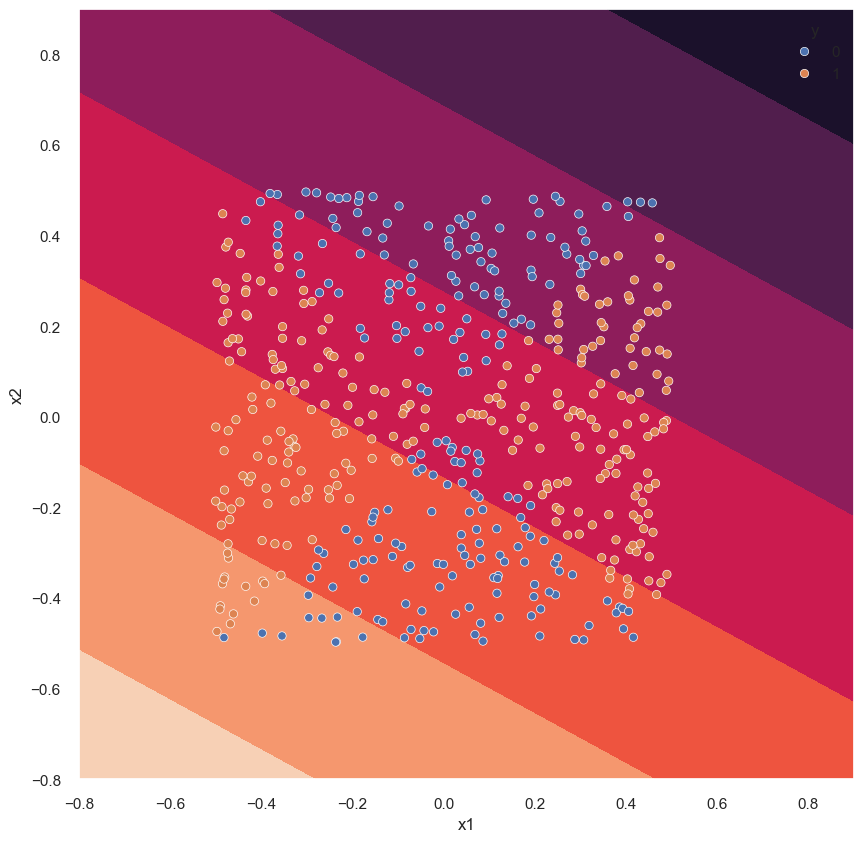

In [94]:
plot_clf(model, data, np.arange(-.8, .9, .005), show_contours=True)

### (h) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the *predicted class labels*.

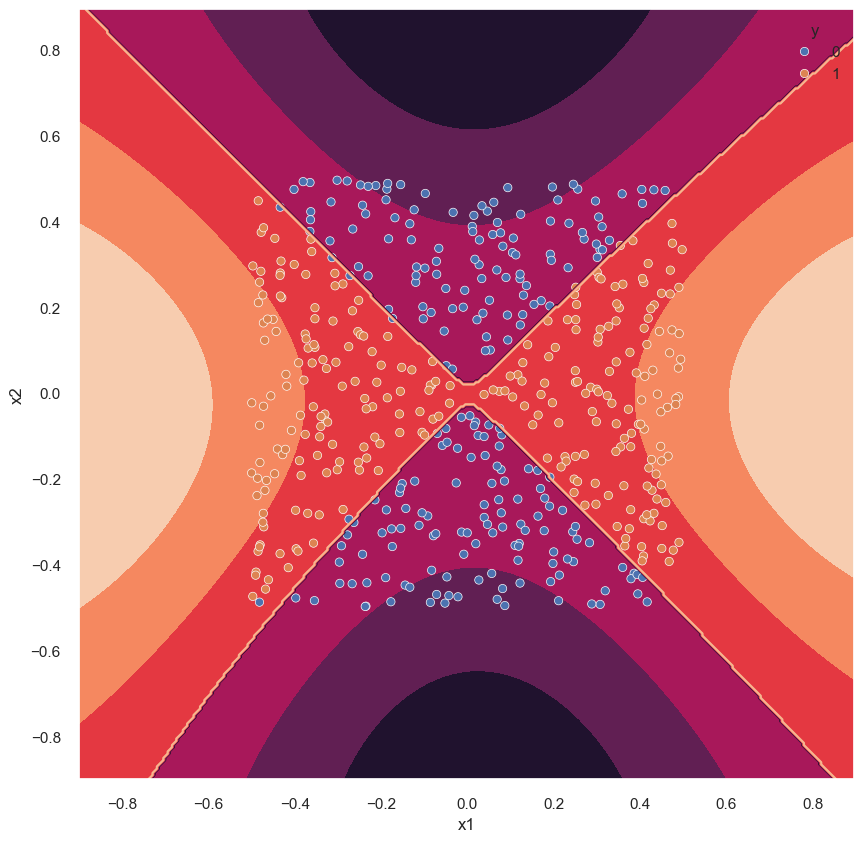

Training accuracy: 0.982


In [96]:
f = 'y ~ x1 + x2 - 1'
y, X = pt.dmatrices(f, data)
y = np.ravel(y)

model = svm.SVC(kernel='rbf', gamma=1, C=1, random_state=0, probability=True).fit(X, y)

plot_clf(model, data, np.arange(-.9, .9, .005), show_contours=True)

print(f'Training accuracy: {model.score(X, y)}')

### (i) Comment on your results.

#### Polynomial logistic regression and SVM with a radial kernel demonstrate comparable performance in fitting the data. The SVM outperforms logistic regression on the training set, achieving an accuracy of $98.2%$ compared to $92.2%$. However, these training rates could be slightly inflated.

#### The linear support vector classifier yields subpar results, likely because the class separation is non-linear, making a linear boundary inadequate.

## Question 7 
### In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the Auto data set.

### (a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.

In [108]:
Auto = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Auto.csv')


Auto = Auto.drop(Auto[Auto.values == '?'].index)
quants = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
Auto[quants] = Auto[quants].astype(np.float64)

Auto['mpg_above_median'] = (Auto['mpg'] > Auto['mpg'].median()) *1.
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_above_median
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,0.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,0.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,0.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,0.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,0.0


### (b) Fit a support vector classifier to the data with various values of cost, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results.

In [112]:
from sklearn import svm, preprocessing
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import patsy as pt

# Assuming 'Auto' and 'mpg_above_median' are defined appropriately

f = 'mpg_above_median ~ cylinders + displacement + horsepower + weight + acceleration + year + C(origin)'
y, X = pt.dmatrices(f, Auto)

# Scale data
X = preprocessing.scale(X)
y = np.ravel(y)

costs = np.logspace(-5, 2, 20)
scores = []
for i in costs:
    # Get cv score 
    model = svm.SVC(kernel='linear', C=i, random_state=0)
    score = np.mean(cross_val_score(model, preprocessing.scale(X), y, cv=5))
    scores += [[i, score]]
    #print(f'progress: {list(costs).index(i)} of {len(costs)}')

columns=['Cost', 'CV_accuracy']
results_df = pd.DataFrame(data=np.asarray(scores), columns=columns)

display(results_df)


,Cost,CV_accuracy
0,0.000010,0.630802
1,0.000023,0.630802
2,0.000055,0.630802
3,0.000127,0.630802
4,0.000298,0.681435
5,0.000695,0.818306
6,0.001624,0.877215
7,0.003793,0.882376
8,0.008859,0.902889
9,0.020691,0.895326


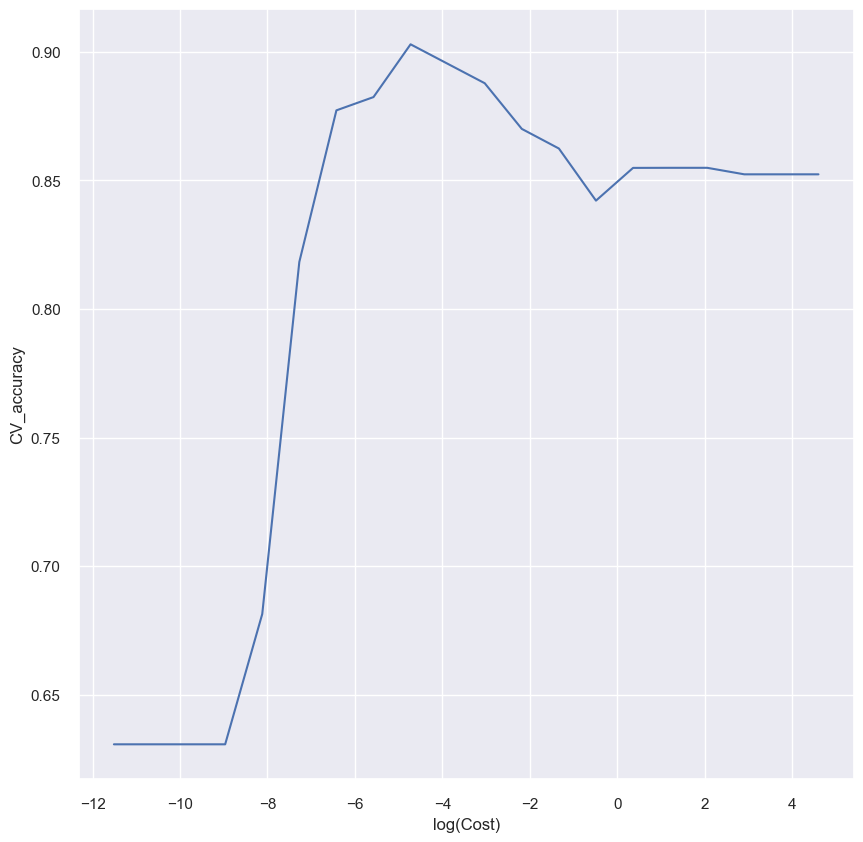

In [113]:
results_df['log(Cost)'] = np.log(results_df['Cost'])
plt.figure(figsize=(10,10))
sns.lineplot(x='log(Cost)', y='CV_accuracy', data=results_df);

### *Errors are discussed under 7(d)*

### (c) Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of gamma and degree and cost. Comment on your results.

In [114]:
C_range     = np.logspace(-5, 3, 10)
gamma_range = np.logspace(-5, 3, 10)
kernels     = ['rbf', 'poly']
degrees     = [3, 5, 7, 9]     # Using only odd values, because I noticed earlier evens are slow!
param_grid  = dict(gamma=gamma_range, C=C_range, kernel=kernels, degree=degrees)
rbf_grid = GridSearchCV(svm.SVC(cache_size=2000), param_grid=param_grid, cv=5, 
                        scoring='accuracy', return_train_score=True)
rbf_grid.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=2000,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             n_jobs=None,
             param_grid={'C': array([1.00000000e-05, 7.74263683e-05, 5.99484250e-04, 4...
       3.59381366e-02, 2.78255940e-01, 2.15443469e+00, 1.66810054e+01,
       1.29154967e+02, 1.00000000e+03]),
                         'degree': [3, 5, 7, 9],
                         'gamma': array([1.00000000e-05, 7.74263683e-05, 5.99484250e-04, 4.64158883e-03,
       3.59381366e-02, 2.78255940e-01, 2.15443469e+00, 1.66810054e+01,
       1.29154967e+02, 1.00000000e+03]),
                         'kernel': ['rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [115]:
rbf_grid.best_params_

{'C': 2.154434690031882,
 'degree': 3,
 'gamma': 0.004641588833612777,
 'kernel': 'rbf'}

In [116]:
pd.DataFrame(rbf_grid.cv_results_).sort_values('rank_test_score', ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
526,0.000720,0.000024,0.000413,0.000016,2.154435,7,0.004642,rbf,"{'C': 2.154434690031882, 'degree': 7, 'gamma':...",0.936709,...,0.902921,0.027958,1,0.916933,0.907348,0.923567,0.910828,0.917197,0.915175,0.005617
486,0.000722,0.000024,0.000412,0.000009,2.154435,3,0.004642,rbf,"{'C': 2.154434690031882, 'degree': 3, 'gamma':...",0.936709,...,0.902921,0.027958,1,0.916933,0.907348,0.923567,0.910828,0.917197,0.915175,0.005617
546,0.000722,0.000026,0.000408,0.000009,2.154435,9,0.004642,rbf,"{'C': 2.154434690031882, 'degree': 9, 'gamma':...",0.936709,...,0.902921,0.027958,1,0.916933,0.907348,0.923567,0.910828,0.917197,0.915175,0.005617
506,0.000724,0.000017,0.000412,0.000009,2.154435,5,0.004642,rbf,"{'C': 2.154434690031882, 'degree': 5, 'gamma':...",0.936709,...,0.902921,0.027958,1,0.916933,0.907348,0.923567,0.910828,0.917197,0.915175,0.005617
390,0.001288,0.000031,0.000700,0.000014,0.035938,9,0.278256,rbf,"{'C': 0.03593813663804626, 'degree': 9, 'gamma...",0.949367,...,0.900325,0.033167,5,0.900958,0.907348,0.917197,0.910828,0.914013,0.910069,0.005610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.001253,0.000009,0.000765,0.000004,0.000077,7,1000.0,rbf,"{'C': 7.742636826811278e-05, 'degree': 7, 'gam...",0.493671,...,0.497468,0.003101,777,0.501597,0.501597,1.000000,1.000000,1.000000,0.800639,0.244166
78,0.001188,0.000009,0.000722,0.000002,0.00001,9,1000.0,rbf,"{'C': 1e-05, 'degree': 9, 'gamma': 1000.0, 'ke...",0.493671,...,0.497468,0.003101,777,0.501597,0.501597,1.000000,1.000000,1.000000,0.800639,0.244166
278,0.001190,0.000015,0.000741,0.000007,0.004642,5,1000.0,rbf,"{'C': 0.004641588833612777, 'degree': 5, 'gamm...",0.493671,...,0.497468,0.003101,777,0.501597,0.501597,1.000000,1.000000,1.000000,0.800639,0.244166
158,0.001177,0.000016,0.000729,0.000006,0.000077,9,1000.0,rbf,"{'C': 7.742636826811278e-05, 'degree': 9, 'gam...",0.493671,...,0.497468,0.003101,777,0.501597,0.501597,1.000000,1.000000,1.000000,0.800639,0.244166


#### The table above displays the models evaluated through grid search, ordered by their cross-validation test scores. Among these models, the radial kernel stands out, boasting the highest mean cross-validation accuracy of 0.902921.

### (d) Make some plots to back up your assertions in (b) and (c).

[0.13826923 0.11512821 0.1125641  0.09461538 0.08948718 0.08948718
 0.08948718 0.09461538 0.10205128 0.10955128 0.10698718 0.10185897
 0.09416667 0.09416667 0.09673077 0.09416667 0.09673077 0.09673077
 0.09673077 0.09673077 0.09673077 0.09673077 0.09673077 0.09673077
 0.09673077]


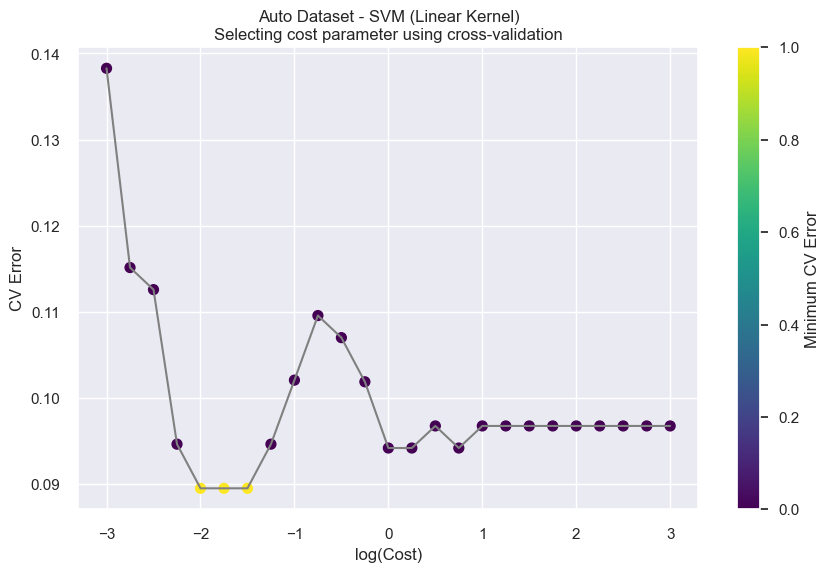

In [148]:
# Define the power range, cost range, number of cross-validation folds, and number of repeats
power_range = np.arange(-3, 3.25, 0.25)
cost_range = np.power(10, power_range)
number = 10
repeats = 5

# Initialize an empty matrix to store cross-validation errors
cv_matrix = np.zeros((len(cost_range), repeats))

# Set seed for reproducibility
np.random.seed(202)

# Perform cross-validation and store errors in the cv_matrix
for i in range(repeats):
    for j, cost in enumerate(cost_range):
        # Define SVM model with linear kernel and current cost parameter
        model = svm.SVC(kernel='linear', C=cost, random_state=0)
        # Perform cross-validation
        cv_scores = cross_val_score(model, preprocessing.scale(X), y, cv=number)
        # Calculate error and store in cv_matrix
        cv_matrix[j, i] = 1 - np.mean(cv_scores)

# Calculate average error for each cost
avg_cv_errors = np.mean(cv_matrix, axis=1)

# Find the minimum average error and corresponding cost
min_cv_error = np.min(avg_cv_errors)
best_cost_index = np.argmin(avg_cv_errors)
best_cost = cost_range[best_cost_index]

print(avg_cv_errors)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(np.log10(cost_range), avg_cv_errors, color='grey', linestyle='-', label='CV Error')
plt.scatter(np.log10(cost_range), avg_cv_errors, c=(avg_cv_errors == min_cv_error), cmap='viridis', s=50)
plt.xlabel('log(Cost)')
plt.ylabel('CV Error')
plt.title('Auto Dataset - SVM (Linear Kernel)\nSelecting cost parameter using cross-validation')
plt.colorbar(label='Minimum CV Error')
plt.grid(True)
plt.show()

In [223]:
# Find the index of the minimum average error AVG_Error
min_error_index = np.argmin(avg_cv_errors)

# Extract the corresponding cost value
lowest_avg_err = cost_range[min_error_index]

# Print the lowest error and its associated cost
print("Lowest Cross-Validation Error:", min_cv_error)
print("Associated Cost (lowest error):", lowest_cost)


Lowest Cross-Validation Error: 0.08948717948717932
Associated Cost (lowest error): -4.726358875093042


In [221]:
# Calculate errors LINEAR
errors = 1 - results_df['CV_accuracy']

# Find the index of the lowest error
min_error_index = errors.idxmin()

# Get the corresponding cost value
lowest_cost = results_df['log(Cost)'][min_error_index]

# Print the lowest error and its associated cost
print("Lowest Error:", errors[min_error_index])
print("Associated Cost:", lowest_cost)


Lowest Error: 0.09711132749107443
Associated Cost: -4.726358875093042


In [166]:
# Target score 
target_score = 1.0

# Calculate error RADIAL
errors = target_score - rbf_grid.cv_results_['mean_test_score']

# Find the index of the lowest error
min_error_index = np.argmin(errors)

# Print the lowest error and its associated hyperparameters
lowest_error = errors[min_error_index]
best_params = rbf_grid.cv_results_['params'][min_error_index]

print("Lowest Error:", lowest_error)
print("Associated Hyperparameters:", best_params)


Lowest Error: 0.09707887049659192
Associated Hyperparameters: {'C': 2.154434690031882, 'degree': 3, 'gamma': 0.004641588833612777, 'kernel': 'rbf'}


In [139]:
# Calculate errors
errors = 1 - results_df['CV_accuracy']

# Optionally, you can calculate confidence intervals for the errors
# For simplicity, let's assume a normal distribution and calculate 95% confidence intervals
std_errors = results_df['CV_accuracy'].std() / np.sqrt(len(results_df))
confidence_intervals = 1.96 * std_errors  # 95% confidence interval

# Now you have the errors and confidence intervals for each cost value
# You can use them for further analysis or visualization
# Print errors
print("Cost\t\tError")
for cost, error in zip(results_df['Cost'], errors):
    print(f"{cost}\t{error}")


Cost		Error
1e-05	0.36919831223628685
2.3357214690901213e-05	0.36919831223628685
5.4555947811685143e-05	0.36919831223628685
0.00012742749857031334	0.36919831223628685
0.00029763514416313193	0.31856540084388185
0.0006951927961775605	0.18169425511197657
0.001623776739188721	0.12278481012658227
0.00379269019073225	0.11762414800389487
0.008858667904100823	0.09711132749107443
0.02069138081114788	0.10467380720545272
0.04832930238571752	0.11223628691983101
0.11288378916846883	0.12999026290165516
0.26366508987303555	0.13761765660499847
0.6158482110660255	0.15787082116196038
1.438449888287663	0.14514767932489447
3.359818286283781	0.14511522233041219
7.847599703514607	0.14511522233041219
18.32980710832434	0.14764686790003245
42.81332398719387	0.14764686790003245
100.0	0.14764686790003245


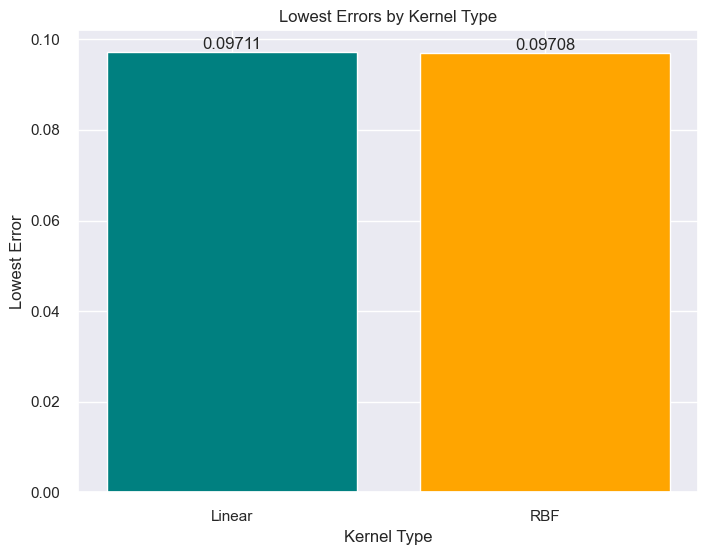

In [225]:
# Target score
target_score = 1.0

# Calculate error for RBF kernel
rbf_errors = target_score - rbf_grid.cv_results_['mean_test_score']
# Find the index of the lowest error for RBF kernel
min_rbf_error_index = np.argmin(rbf_errors)
# Get the lowest error and its associated hyperparameters for RBF kernel
lowest_rbf_error = rbf_errors[min_rbf_error_index]
best_rbf_params = rbf_grid.cv_results_['params'][min_rbf_error_index]

# Calculate errors for linear kernel
linear_errors = 1 - results_df['CV_accuracy']
# Find the index of the lowest error for linear kernel
min_linear_error_index = linear_errors.idxmin()
# Get the lowest error and its associated cost for linear kernel
lowest_linear_error = linear_errors[min_linear_error_index]
lowest_linear_cost = results_df['Cost'][min_linear_error_index]

# Data for plotting
kernel_errors = {
    'Kernel': ['Linear', 'RBF'],
    'Lowest Error': [lowest_linear_error, lowest_rbf_error]
}

# Create DataFrame
df_kernel_errors = pd.DataFrame(kernel_errors)

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(df_kernel_errors['Kernel'], df_kernel_errors['Lowest Error'], color=['teal', 'orange'])
plt.xlabel('Kernel Type')
plt.ylabel('Lowest Error')
plt.title('Lowest Errors by Kernel Type')

# Annotate bars with error values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '{:.5f}'.format(height), ha='center', va='bottom')

plt.show()


#### The errors for SVC of both Linear and Radial are very similar with *0.09711* and *0.09708*. Values are considerably low. 
#### The average CV error was found to be *0.0894*.

### 8. This problem involves the OJ data set which is part of the ISLP package.
### (a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [176]:
oj_df = pd.read_csv('/Users/nupoor/Downloads/oj.csv')
oj_df.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


### (a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [177]:
preds = "+".join(oj_df.columns.drop("Purchase"))
f = f'Purchase ~ {preds}'
y, X = pt.dmatrices(f, oj_df)
y = y[:, 0]

# scale data
X = preprocessing.scale(X)

# Split training test sets
test_size = len(y)-800
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

### (b) Fit a support vector classifier to the training data using C = 0.01, with Purchase as the response and the other variables as predictors. How many support points are there?

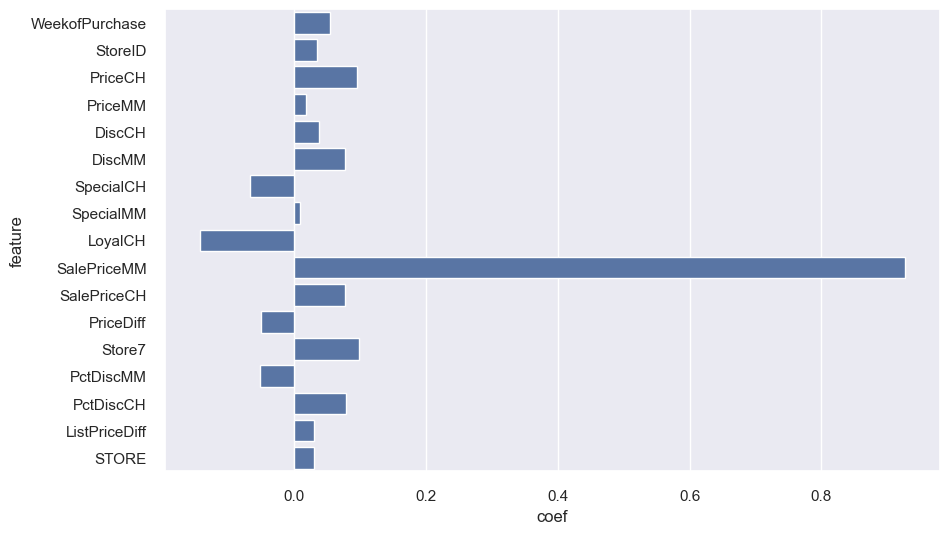

In [193]:
model = SVC(C=0.01, kernel='linear', random_state=0).fit(X_train, y_train)

df = pd.DataFrame({'feature': oj_df.columns.drop('Purchase'),
              'coef': np.ravel(model.coef_)[1:]})
plt.figure(figsize=(10,6))
sns.barplot(x='coef', y='feature', data=df);

In [194]:
model.support_vectors_

array([[ 0.        , -0.70611574, -1.24630511, ..., -0.4391058 ,
         0.76298277, -0.44123443],
       [ 0.        ,  1.41619842,  1.39017888, ..., -0.4391058 ,
        -0.72559444, -1.14067272],
       [ 0.        ,  1.41619842,  0.68282952, ...,  2.75887479,
         0.48387455, -1.14067272],
       ...,
       [ 0.        , -0.70611574, -1.69643652, ..., -0.4391058 ,
        -2.02809951,  0.25820385],
       [ 0.        , -0.70611574,  1.45448337, ...,  1.09930091,
        -2.02809951,  1.65708043],
       [ 0.        , -0.70611574, -1.18200062, ..., -0.4391058 ,
         0.76298277,  0.95764214]])

In [203]:
model.support_vectors_.shape[0]

433

#### There are 433 support points in the data.

### (c) What are the training and test error rates?


In [215]:
accuracy_train = model.score(X_train, y_train)
accuracy_test  = model.score(X_test, y_test)
print(f'train accuracy: {accuracy_train:.3f}')
print(f'test accuracy : {accuracy_test:.3f}')

train accuracy: 0.833
test accuracy : 0.833


### (d) Use cross-validation to select an optimal C. Consider values in the range 0.01 to 10.

In [211]:
C_range = np.logspace(-2, 1, 10)
param_grid = {'C': C_range, 'kernel': ['linear']}

model_grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5, 
                          scoring='accuracy', return_train_score=True)

model_grid.fit(X, y)


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             n_jobs=None,
             param_grid={'C': array([ 0.01      ,  0.02154435,  0.04641589,  0.1       ,  0.21544347,
        0.46415888,  1.        ,  2.15443469,  4.64158883, 10.        ]),
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

### (e) Compute the training and test error rates using this new value for `C`.

In [212]:
accuracy_train = model_grid.score(X_train, y_train)
accuracy_test  = model_grid.score(X_test, y_test)
print(f'train accuracy: {accuracy_train:.3f}')
print(f'test accuracy : {accuracy_test:.3f}')

train accuracy: 0.839
test accuracy : 0.837


### (f) Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for `gamma`.

In [213]:
C_range     = np.logspace(-2, 1, 10)
param_grid  = dict(C=C_range)
model_grid  = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=5, 
                           scoring='accuracy', return_train_score=True)
model_grid.fit(X, y)

accuracy_train = model_grid.score(X_train, y_train)
accuracy_test  = model_grid.score(X_test, y_test)
print(f'train accuracy: {accuracy_train:.3f}')
print(f'test accuracy : {accuracy_test:.3f}')

train accuracy: 0.851
test accuracy : 0.844


### (g) Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set `degree=2`.

In [214]:
C_range     = np.logspace(-2, 1, 10)
param_grid  = dict(C=C_range)
model_grid  = GridSearchCV(svm.SVC(kernel='poly', degree=2), param_grid=param_grid, cv=5, 
                           scoring='accuracy', return_train_score=True)
model_grid.fit(X, y)

accuracy_train = model_grid.score(X_train, y_train)
accuracy_test  = model_grid.score(X_test, y_test)
print(f'train accuracy: {accuracy_train:.3f}')
print(f'test accuracy : {accuracy_test:.3f}')

train accuracy: 0.806
test accuracy : 0.767


### (h) Overall, which approach seems to give the best results on this data?

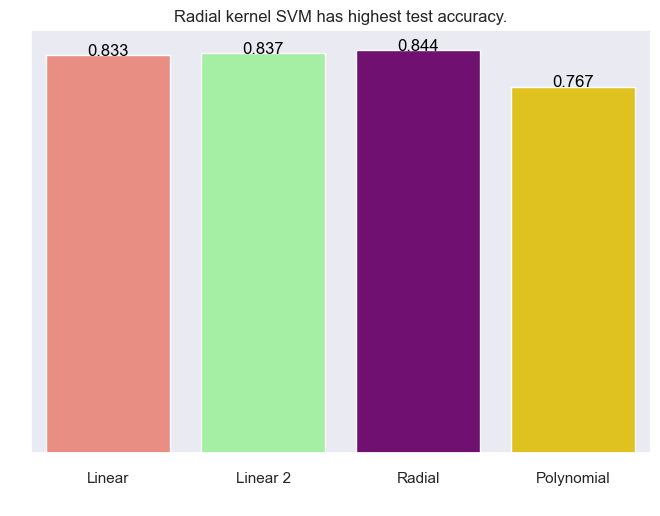

In [240]:
# Create data frame of Model Names and Test Accuracy scores
df = pd.DataFrame({
    'Models':["Linear","Linear 2","Radial","Polynomial"],
    'Accuracy':[0.833, 0.837, 0.844, 0.767] 
}, columns=['Models', 'Accuracy'])



# Define custom colors for each bar
colors = ["salmon", "palegreen", "purple", "gold"]

# Bar plot in seaborn with custom colors
ax = sns.barplot(x="Models", y="Accuracy", data=df, dodge=False, palette=colors)
ax.set_yticks([]) #remove y-axis
ax.set_xlabel(' ')
ax.set_ylabel(' ')
ax.set_title('Radial kernel SVM has highest test accuracy.')

for index, row in df.iterrows():
    ax.text(row.name,row.Accuracy, round(row.Accuracy,3), color='black', ha="center")

#### As mentioned in the graph, `Radial` approach gives the best test accuracy, which is *84.4%*.